In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [3]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [4]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [5]:
len(y)

2580

In [6]:
X.shape

(2580, 82)

In [7]:
X.shape[1]

82

In [8]:
Scores = []
AdjR2 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Scores.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    

In [9]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [10]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [11]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)
R2vAR2

,R_Squared,Adjusted_R2
0,0.910281,0.907334
1,0.931747,0.929505
2,0.898528,0.895196
3,0.915530,0.912756
4,0.914647,0.911844
...,...,...
95,0.918687,0.916016
96,0.904030,0.900878
97,0.921101,0.918510
98,0.914464,0.911655


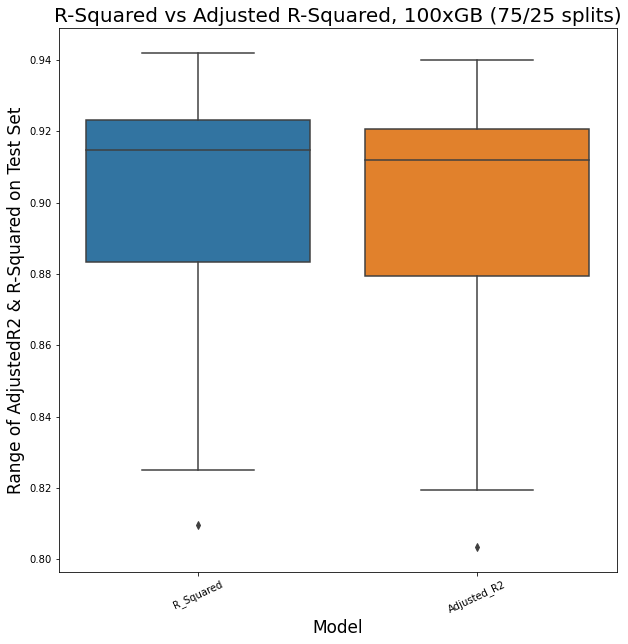

In [12]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xGB (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [13]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [14]:
#df = pd.DataFrame(Positive, columns=['Gradient Boost'])
R2vAR2.to_csv('GB_R2vAR2.csv', index=False)

In [15]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [16]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.910281,0.907334,0.002946
1,0.931747,0.929505,0.002241
2,0.898528,0.895196,0.003332
3,0.915530,0.912756,0.002774
4,0.914647,0.911844,0.002803
...,...,...,...
95,0.918687,0.916016,0.002670
96,0.904030,0.900878,0.003152
97,0.921101,0.918510,0.002591
98,0.914464,0.911655,0.002809


In [17]:
R2vAR2.Difference.mean()

0.003296881961815773

In [18]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.899606,0.896309,0.003297
std,0.034513,0.035646,0.001133
min,0.809703,0.803453,0.001904
25%,0.883262,0.879429,0.002524
50%,0.914617,0.911813,0.002804
75%,0.923132,0.920607,0.003834
max,0.942007,0.940102,0.006249
